<img src='https://i.imgur.com/OHxPOjG.png'><center>Source geeksforgeeks.org</center>

<ul style="font-family:'Georgia';font-size:18px" >
<h3><strong>Table Of Content: </strong></h3>
<br>
<br>
<li>
<h5>Introduction</h5>
    <ul>
        <li>Loading Libraries</li>
        <li>loading Data</li>
    </ul>
<li>
<h5>Modelling</h5>
    <ul>
        <li>Logistic Regression</li>
        <li>Random Forest</li>
        <li>Light GBM</li>
        <li>XGBoost</li>
        <li>Ensemble</li>
        <li>LogisticRegression</li>
        <li>XGBoost</li>
    </ul>
<li>
    <h5> Screenshots of faild cases </h5>

<h2> Loading Libraries </h2>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
sns.set()
from matplotlib.pyplot import figure

https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling
<br>
This code disable the autoscrolling 

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h2> Loading Data </h2>

In [3]:
final_data=pd.read_csv('/home/asad_99rizvi/dataset/final_dataset.csv')
final_data.head()

,msno,city,bd,registered_via,registration_flag,age_flag,city_flag,year,month_flag,year_flag,...,mean_diff_second_last_2_month_25,mean_diff_second_last_2_month_50,mean_diff_second_last_2_month_75,mean_diff_second_last_2_month_985,mean_diff_second_last_2_month_100,mean_diff_second_last_2_month_num_unq,sum_diff_second_last_2_month_num_unq,mean_diff_second_last_2_month_total_secs,sum_diff_second_last_2_month_total_secs,second_login_difference
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1.0,29.668986,7.0,1.0,0.0,1.0,2011.0,1.0,1.0,...,2.936552,0.372414,0.299310,0.281379,3.081379,6.398621,99.0,1106.795709,2210.517,-4.0
1,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6.0,32.000000,9.0,1.0,0.0,0.0,2011.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0
2,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4.0,30.000000,9.0,1.0,0.0,0.0,2011.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0
3,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13.0,63.000000,9.0,1.0,0.0,1.0,2011.0,1.0,1.0,...,-1.314103,-0.365385,-0.121795,-0.666667,6.705128,2.858974,53.0,1422.618904,21937.919,1.0
4,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1.0,29.668986,7.0,1.0,0.0,1.0,2011.0,1.0,1.0,...,-1.416667,0.541667,-0.291667,-0.416667,-6.041667,-5.375000,-98.0,-1751.785833,-29315.657,-4.0


In [4]:
final_data.shape

(1076941, 103)

In [5]:
train_data=pd.read_csv('/home/asad_99rizvi/dataset/train_v2.csv')
train_data=pd.merge(train_data,final_data,on='msno',how='left')
train_data.fillna(0,inplace=True)

In [6]:
train_data.shape

(970960, 104)

In [7]:
train_features=train_data.columns
train_features=list(train_features)
train_features.remove('is_churn')
train_features.remove('msno')
train_data.head()

,msno,is_churn,city,bd,registered_via,registration_flag,age_flag,city_flag,year,month_flag,...,mean_diff_second_last_2_month_25,mean_diff_second_last_2_month_50,mean_diff_second_last_2_month_75,mean_diff_second_last_2_month_985,mean_diff_second_last_2_month_100,mean_diff_second_last_2_month_num_unq,sum_diff_second_last_2_month_num_unq,mean_diff_second_last_2_month_total_secs,sum_diff_second_last_2_month_total_secs,second_login_difference
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.000000,3.0,0.0,0.0,0.0,2013.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.000000,3.0,0.0,1.0,1.0,2013.0,1.0,...,1.777778,0.555556,0.222222,0.333333,7.666667,7.555556,68.0,2052.691444,18474.223,9.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.000000,3.0,0.0,0.0,1.0,2013.0,1.0,...,-3.861111,-0.022222,-1.277778,-1.227778,-1.850000,-7.372222,-186.0,-1291.532561,-32445.927,-2.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,29.668986,7.0,1.0,0.0,1.0,2014.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.000000,7.0,1.0,0.0,1.0,2014.0,1.0,...,4.166667,1.416667,0.166667,-0.500000,12.000000,12.750000,208.0,2822.911250,44527.016,11.0


In [8]:
train_data.shape

(970960, 104)

#### Perparing data for balancing

In [9]:
churned_user=train_data[train_data['is_churn']==1]

In [10]:
not_churned_user=train_data[train_data['is_churn']==0]

In [11]:
not_churned_user_sampled=not_churned_user.sample(frac=0.7)

In [12]:
new_sampled_data=not_churned_user_sampled.append(churned_user,ignore_index=True)

In [13]:
new_sampled_data.head()

,msno,is_churn,city,bd,registered_via,registration_flag,age_flag,city_flag,year,month_flag,...,mean_diff_second_last_2_month_25,mean_diff_second_last_2_month_50,mean_diff_second_last_2_month_75,mean_diff_second_last_2_month_985,mean_diff_second_last_2_month_100,mean_diff_second_last_2_month_num_unq,sum_diff_second_last_2_month_num_unq,mean_diff_second_last_2_month_total_secs,sum_diff_second_last_2_month_total_secs,second_login_difference
0,ZpNxzvOjtiQdSdC8G29EvlSVv/UTTi1Z88rn2lG7LsU=,0,1.0,29.668986,7.0,1.0,0.0,1.0,2016.0,1.0,...,-2.922222,-0.500000,-0.277778,-0.311111,-5.322222,-9.644444,-105.0,-1648.495700,-13963.686,3.0
1,ZqhOGZSxa+ZZUaxW6OPzboikbu9vVrgmYOYZAV6WNUE=,0,5.0,28.000000,9.0,1.0,0.0,0.0,2011.0,1.0,...,5.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.0,13.315000,13.315,0.0
2,az+PGx3uTVdsDn+unSQ3WFRYIDdUyjFUIg6Hsva4C78=,0,1.0,29.668986,7.0,1.0,0.0,1.0,2015.0,0.0,...,-0.840909,-0.086364,-0.509091,-0.318182,6.000000,6.077273,174.0,1015.628086,33814.414,2.0
3,MN1NdOeuBRGR+osC7FYzvc/MuafWKlYbXtP4IlzsNlY=,0,1.0,29.668986,7.0,1.0,0.0,1.0,2015.0,1.0,...,0.500000,0.875000,0.000000,-0.125000,-4.875000,-2.875000,-54.0,-1083.514125,-13681.791,-4.0
4,9gcDFUz9JEIPYDtqTQ7MCBMtmeT46oVX2f1m33TtBpE=,0,1.0,29.668986,7.0,1.0,0.0,1.0,2015.0,1.0,...,-3.166667,-1.000000,0.000000,0.000000,-7.000000,-8.666667,9.0,-1973.631333,1413.130,1.0


In [14]:
X_train=new_sampled_data[train_features]
y_train=new_sampled_data['is_churn']

<h2> Balancing data Using SMOTE </h2>

In [15]:
#using smote to balance the imbalance in the dataset
smote=SMOTE(random_state=110,n_jobs=-1)
X_bal,y_bal=smote.fit_resample(X_train,y_train)

> visualizing after balancing the data

<AxesSubplot:xlabel='is_churn', ylabel='count'>

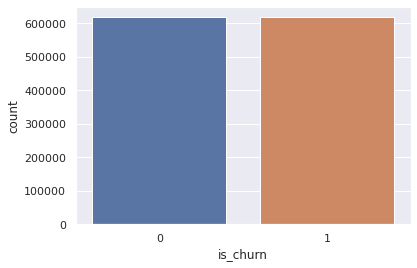

In [16]:
sns.countplot(y_bal)

### we can see that the data is now balanced

In [17]:
impute=dict(X_bal.mean())

In [18]:
import pickle
output = open('impute.pkl', 'wb')
pickle.dump(impute, output)
output.close()

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_bal)
X_bal=sc.transform(X_bal)
X_bal.shape

(1237082, 102)

In [20]:
with open("sc.pkl", 'wb') as output:
    pickle.dump(sc, output, pickle.HIGHEST_PROTOCOL)

In [21]:
print(X_bal.shape,y_bal.shape)

(1237082, 102) (1237082,)


### loading test data

In [22]:
test_data=pd.read_csv('/home/asad_99rizvi/dataset/sample_submission_v2.csv')
test_data=pd.merge(test_data,final_data,on='msno',how='left')

In [23]:
test_data.fillna(impute,inplace=True)

In [24]:
X_test=test_data[train_features]
X_test=sc.transform(X_test)

In [25]:
print(X_bal.shape,X_test.shape)

(1237082, 102) (907471, 102)


### Splitting data

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X_bal,y_bal,test_size=0.3,random_state=110,stratify=y_bal)

In [27]:
print(X_train.shape,X_cv.shape)

(865957, 102) (371125, 102)


In [28]:
from sklearn.linear_model import SGDClassifier


<h2> writing some helper functions </h2>

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
def result(y_pred,y_pred_proba,y_true,confusion=0,silent=0):
    """
    Function require 3 inputs
    predicted value
    predicted probabilities
    true labels
    final 1 or 0 
    if 1 confusion matrix will be printed
    """
    loss=log_loss(y_true,y_pred_proba)
    if silent==0:
        print("log loss is ",loss)
        print('F1 score is',f1_score(y_true,y_pred))
    if confusion==1:
        cf_matrix = confusion_matrix(y_true, y_pred)
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.show()
    return loss

def lowest(hyperparameter,loss_all):
    """
    this function return the
    best hyperparameter and lowest loss associated with it
    """
    lowest_loss_index=np.argsort(loss_all)[0]
    lowest_loss=loss_all[lowest_loss_index]
    hyperparameter=hyperparameter[lowest_loss_index]
    print( 'The best hyperparameter is ',hyperparameter,'and the lowest loss associaed with it ',lowest_loss)
    return hyperparameter
def plot_result(hyperparameter,loss_all):
    figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
    sns.scatterplot(x=hyperparameter,y=loss_all)
    plt.plot()

<h2><b> SGDClassifier with hinge loss L2 penality</b></h2>

Model is training
Done
log loss is  0.28944152164880416
F1 score is 0.8923715386196244
Model is training
Done
log loss is  0.2761495776019654
F1 score is 0.8981120176579559
Model is training
Done
log loss is  0.2762418362800141
F1 score is 0.8951317050599861
Model is training
Done
log loss is  0.27803437490275307
F1 score is 0.894891600975294
Model is training
Done
log loss is  0.28177581566620863
F1 score is 0.8897831254897274
Model is training
Done
log loss is  0.31742620082468387
F1 score is 0.8715447583143298
Model is training
Done
log loss is  0.37256349777044306
F1 score is 0.8515533446535766
Model is training
Done
log loss is  0.37670139198081104
F1 score is 0.8506648991753698
Model is training
Done
log loss is  0.3767013919807918
F1 score is 0.8506648991753698
Model is training
Done
log loss is  0.37670145596128607
F1 score is 0.8506648991753698
The best hyperparameter is  0.0001 and the lowest loss associaed with it  0.2761495776019654
*****************************************

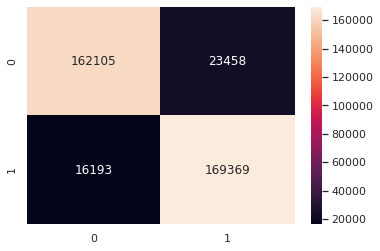

*******************************************
feature importance of top 50 features


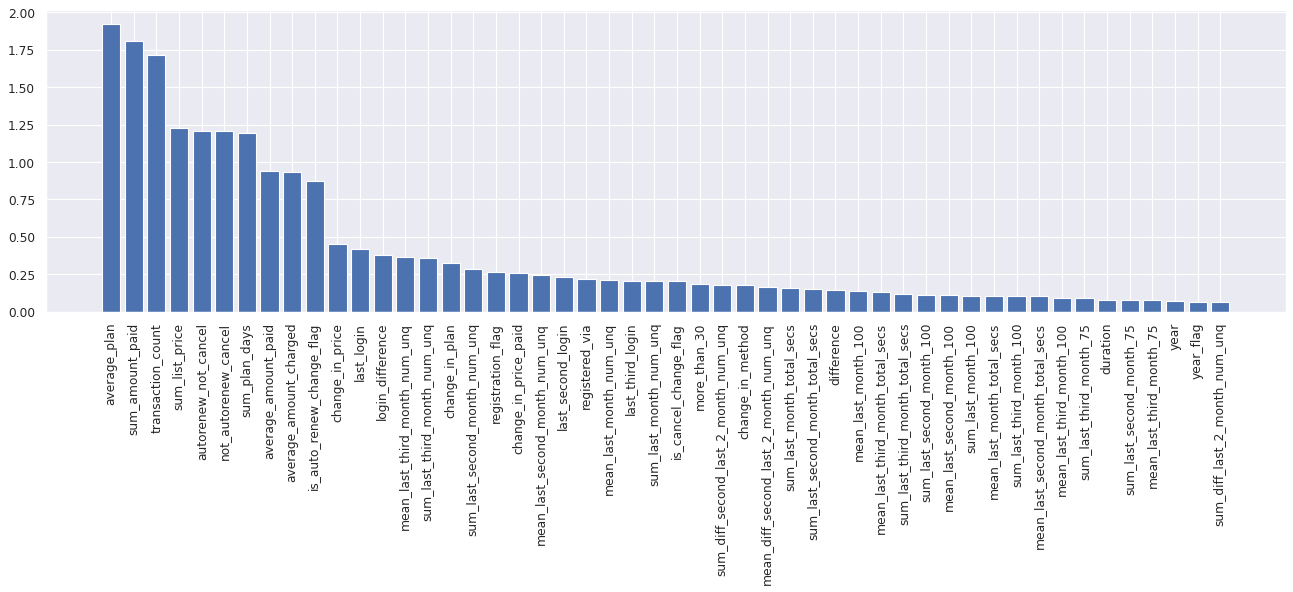

In [39]:
feature_importance_sgd=[]
feature_importance_values_sgd=[]
reg=[]
loss_all=[]

#using a sample to find hyperparameter
sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])

#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=SGDClassifier(loss='hinge',alpha=i,n_jobs=-1,random_state=110)
    print("Model is training")
    model.fit(X_train[:sample_points_train],y_train[:sample_points_train])
    calibration=CalibratedClassifierCV(model,method='isotonic')
    calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
    print("Done")
    y_pred_proba=calibration.predict_proba(X_cv[:sample_points_cv])
    y_pred=calibration.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
    
    
# training model with best hyperparameter

hyperparameter=lowest(reg,loss_all)
print("********************************************")
print("Training model with best hyperparameter")
model=SGDClassifier(loss='log',alpha=hyperparameter,n_jobs=-1,random_state=110)
print("Model is training")
model.fit(X_train,y_train)
calibration=CalibratedClassifierCV(model,method='isotonic')
calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
print("Done")
y_pred_proba=calibration.predict_proba(X_cv)
y_pred=calibration.predict(X_cv)
loss=result(y_pred,y_pred_proba,y_cv,confusion=1)



# visualizing
print("*******************************************")
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_sgd.append(feature_name)
feature_importance_values_sgd.append(feature_importance)

In [40]:
feature_set=set(feature_importance_sgd[0][:50])
len(feature_set)

50

In [41]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred

In [42]:
msno.to_csv('/home/asad_99rizvi/another_data/sgdhinge_all_features.csv',index=False)

In [43]:
cd another_data

/home/asad_99rizvi/another_data


In [44]:
!kaggle competitions submit kkbox-churn-prediction-challenge -f sgdhinge_all_features.csv -m "My submission"

100%|██████████████████████████████████████| 56.4M/56.4M [00:00<00:00, 61.0MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

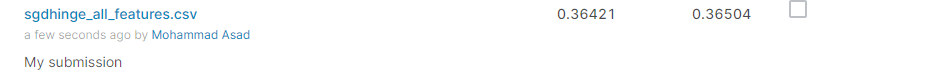

<h2> SGDClassifier with L1 penalty </h2>

Model is training
Done
log loss is  0.27803220008761137
F1 score is 0.8963868750123466
Model is training
Done
log loss is  0.27013178831686785
F1 score is 0.8975318271353595
Model is training
Done
log loss is  0.2739893728608687
F1 score is 0.896415079386046
Model is training
Done
log loss is  0.2855697726619416
F1 score is 0.8861847005000533
Model is training
Done
log loss is  0.3587496132603604
F1 score is 0.851157495256167
Model is training
Done
log loss is  0.6931572658086407
F1 score is 0.0
Model is training
Done
log loss is  0.6931572658086407
F1 score is 0.0
Model is training
Done
log loss is  0.6931572658086407
F1 score is 0.0
Model is training
Done
log loss is  0.6931572658086407
F1 score is 0.0
Model is training
Done
log loss is  0.6931572658086407
F1 score is 0.0
The best hyperparameter is  0.0001 and the lowest loss associaed with it  0.27013178831686785
********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  

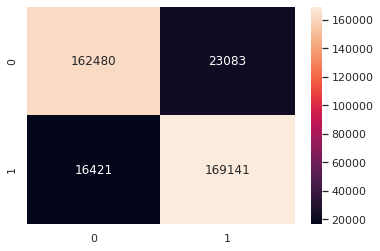

*******************************************
feature importance of top 50 features


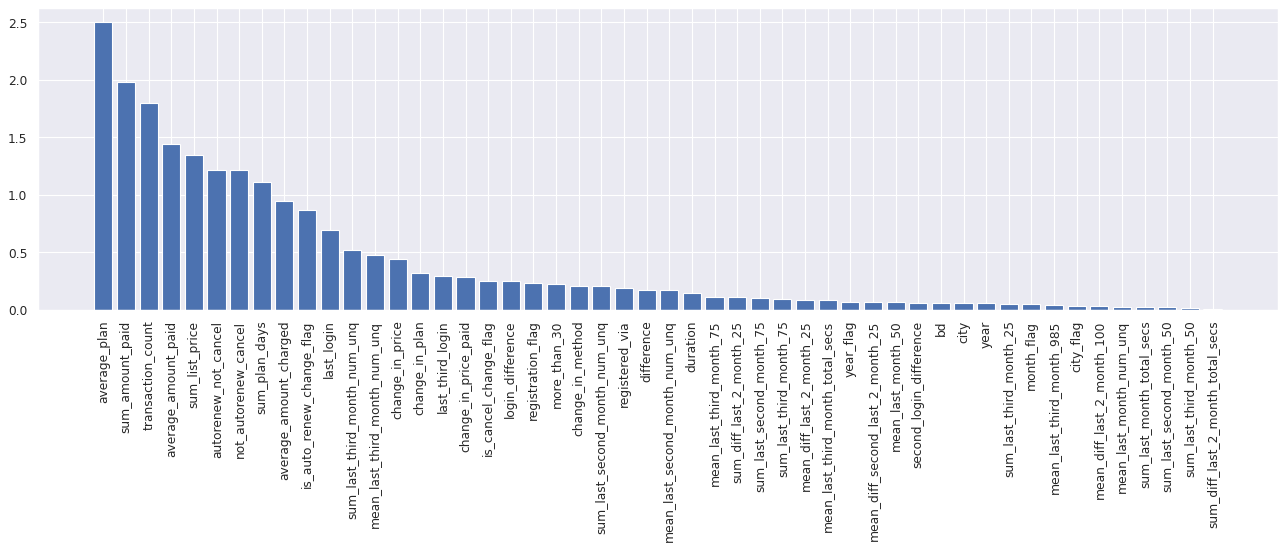

In [49]:
feature_importance_sgd=[]
feature_importance_values_sgd=[]
reg=[]
loss_all=[]


#using a sample to find hyperparameter

sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])



#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=SGDClassifier(loss='hinge',alpha=i,n_jobs=-1,random_state=110, penalty='l1')
    print("Model is training")
    model.fit(X_train[:sample_points_train],y_train[:sample_points_train])
    calibration=CalibratedClassifierCV(model,method='isotonic')
    calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
    print("Done")
    y_pred_proba=calibration.predict_proba(X_cv[:sample_points_cv])
    y_pred=calibration.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)

# training model with best hyperparameter


print("********************************************")
print("Training model with best hyperparameter")
model=SGDClassifier(loss='log',alpha=hyperparameter,n_jobs=-1,random_state=110, penalty='l1')
print("Model is training")
model.fit(X_train,y_train)
calibration=CalibratedClassifierCV(model,method='isotonic')
calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
print("Done")
y_pred_proba=calibration.predict_proba(X_cv)
y_pred=calibration.predict(X_cv)
loss=result(y_pred,y_pred_proba,y_cv,confusion=1)
print("*******************************************")



# visualizing

figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_sgd.append(feature_name)
feature_importance_values_sgd.append(feature_importance)

In [50]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno.to_csv('/home/asad_99rizvi/another_data/l1penalty_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f l1penalty_all_features.csv -m "My submission"

100%|██████████████████████████████████████| 56.5M/56.5M [00:00<00:00, 74.7MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

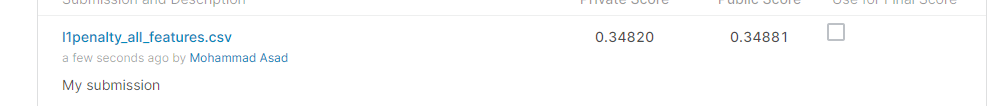

<h2><b> Logistic Regression with l2 penalty</b></h2>

Model is training
Done
log loss is  0.38788027772828737
F1 score is 0.8825925360215876
Model is training
Done
log loss is  0.29481095518240125
F1 score is 0.891770943934548
Model is training
Done
log loss is  0.27798375276770454
F1 score is 0.8944502755182367
Model is training
Done
log loss is  0.27476234835908236
F1 score is 0.8962969293372864
Model is training
Done
log loss is  0.2740859596253078
F1 score is 0.8969872385212472
Model is training
Done
log loss is  0.27410483323347445
F1 score is 0.89698636264958
Model is training
Done
log loss is  0.27408940748955063
F1 score is 0.8970676281144526
Model is training
Done
log loss is  0.2740684221418359
F1 score is 0.8969334035272439
Model is training
Done
log loss is  0.2740806374913039
F1 score is 0.896998079402247
Model is training
Done
log loss is  0.27409861609045605
F1 score is 0.8969750398021078
The best hyperparameter is  100 and the lowest loss associaed with it  0.2740684221418359
********************************************
Tr

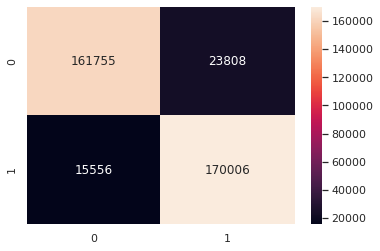

*******************************************
feature importance of top 50 features


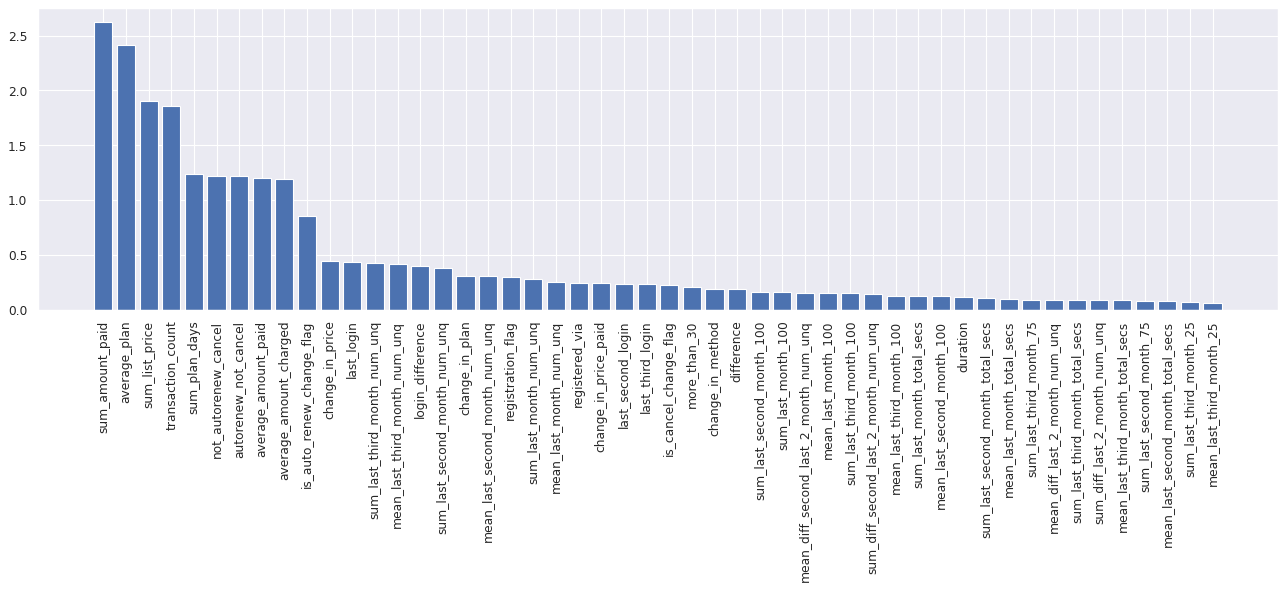

In [45]:
from sklearn.linear_model import LogisticRegression
feature_importance_lr=[]
feature_importance_values_lr=[]
reg=[]
loss_all=[]


#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=LogisticRegression(C=i,n_jobs=-1,random_state=110)
    print("Model is training")
    model.fit(X_train[:sample_points_train],y_train[:sample_points_train])
    print("Done")
    y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
    y_pred=model.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)


# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=LogisticRegression(C=hyperparameter,n_jobs=-1,random_state=110)
print("Model is training")
model.fit(X_train,y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,y_cv,confusion=1)



# visualizing

print("*******************************************")
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_lr.append(feature_name)
feature_importance_values_lr.append(feature_importance)

In [46]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno.to_csv('/home/asad_99rizvi/another_data/logistic_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f logistic_all_features.csv -m "My submission"

100%|██████████████████████████████████████| 56.4M/56.4M [00:00<00:00, 70.6MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

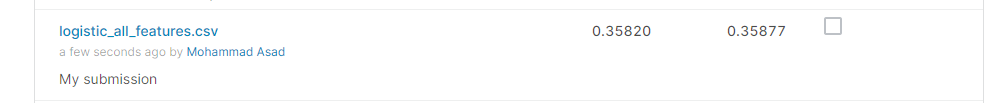

<strong>
We will treat both SGDClassifier and logistic classifer as our base line model and the lowest loss of these base line models are<br>
1. SGD classifer log loss of 0.2727275126483681 with 0.0001 penalty l2<br>
2. SGD classifer log loss of 0.27013178831686785 with 0.0001 penalty l1<br>
2. Logisitic Regression log loss of 0.27632660304346857 with C 100
</strong>

<h2> Logistic regession with l1 penalty </h2>

Model is training
Done
log loss is  0.6931471805599453
F1 score is 0.0
Model is training
Done
log loss is  0.6931471805599453
F1 score is 0.0
Model is training
Done
log loss is  0.40339467129945605
F1 score is 0.8849557522123893
Model is training
Done
log loss is  0.3111773752242121
F1 score is 0.9038461538461539
Model is training
Done
log loss is  0.37946204223801705
F1 score is 0.9126213592233009
Model is training
Done
log loss is  0.4570900778958511
F1 score is 0.9
Model is training
Done
log loss is  0.4751938831032828
F1 score is 0.8910891089108911
Model is training
Done
log loss is  0.4780737598076446
F1 score is 0.8910891089108911
The best hyperparameter is  0.1 and the lowest loss associaed with it  0.3111773752242121
********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.2814341531415321
F1 score is 0.895090488415581


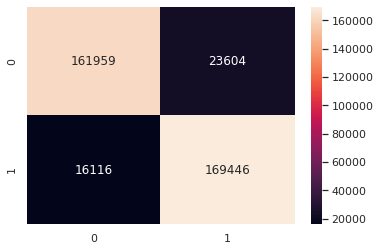

*******************************************
feature importance of top 50 features


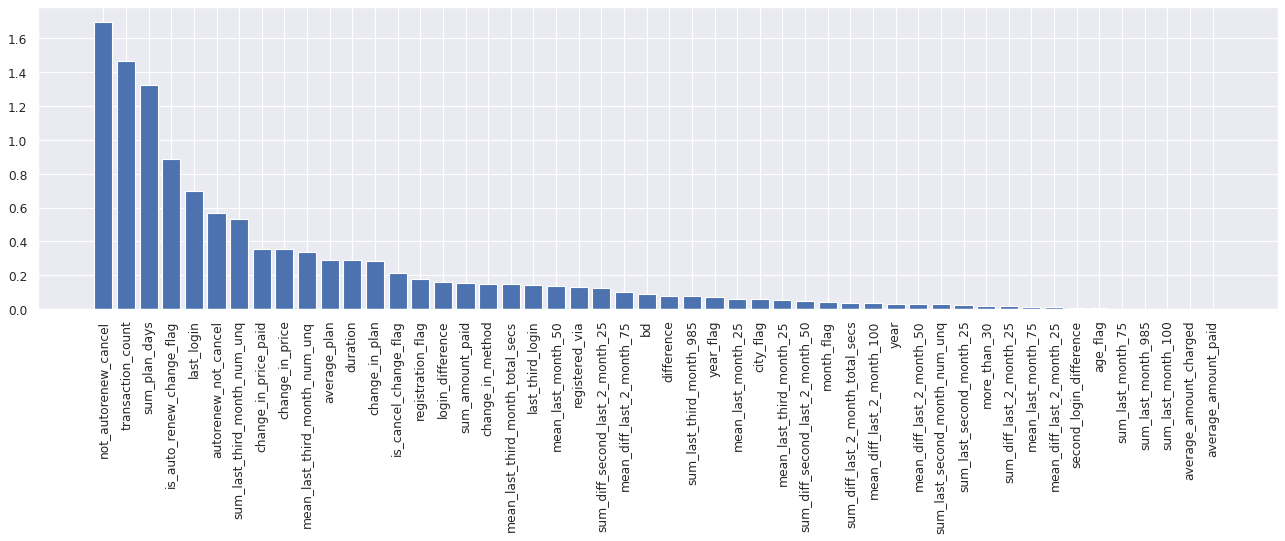

In [32]:
from sklearn.linear_model import LogisticRegression
feature_importance_lr=[]
feature_importance_values_lr=[]
reg=[]
loss_all=[]


#hyperparameter tuning

for i in [10**i for i in range(-4,4)]:
    model=LogisticRegression(C=i,n_jobs=-1,random_state=110,penalty='l1',solver='liblinear')
    print("Model is training")
    model.fit(X_train[:sample_points_train],y_train[:sample_points_train])
    print("Done")
    y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
    y_pred=model.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)


# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=LogisticRegression(C=hyperparameter,n_jobs=-1,random_state=110,penalty='l1',solver='liblinear')
print("Model is training")
model.fit(X_train,y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,y_cv,confusion=1)
print("*******************************************")

# visualizing


figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_lr.append(feature_name)
feature_importance_values_lr.append(feature_importance)

In [35]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno.to_csv('/home/asad_99rizvi/another_data/logisticl1_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f logisticl1_all_features.csv -m "My submission"

100%|██████████████████████████████████████| 56.4M/56.4M [00:01<00:00, 54.1MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

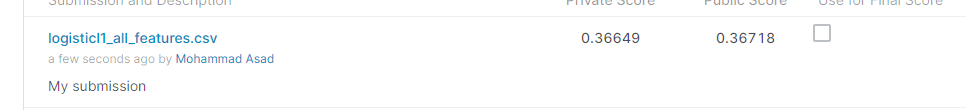

<h2><b> Random Forest Classifier</b></h2>

In [30]:
from sklearn.ensemble import RandomForestClassifier
feature_importance_rf=[]
feature_importance_values_rf=[]
parameter=[]
loss_all=[]

#hyperparameter tuning
for i in [100,200,500]:
    for j in [2,5,10,50]:
        model=RandomForestClassifier(n_estimators=i,random_state=110,n_jobs=-1,min_samples_split=j)
        print("Model is training")
        model.fit(X_train[:sample_points_train],y_train[:sample_points_train])
        print("Done")
        y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
        y_pred=model.predict(X_cv[:sample_points_cv])
        loss=result(y_pred,y_pred_proba,y_cv[:sample_points_cv])
        parameter.append((i,j))
        loss_all.append(loss)

Model is training
Done
log loss is  0.12117345102530784
F1 score is 0.9641573448889784
Model is training
Done
log loss is  0.11962281547781754
F1 score is 0.9640337037161368
Model is training
Done
log loss is  0.11944986503458599
F1 score is 0.9635629705749998
Model is training
Done
log loss is  0.12382535567905875
F1 score is 0.9618835584286691
Model is training
Done
log loss is  0.11783751260931387
F1 score is 0.9645884549765581
Model is training
Done
log loss is  0.11801884220893269
F1 score is 0.9641471176699655
Model is training
Done
log loss is  0.11841773907823434
F1 score is 0.9640266509053785
Model is training
Done
log loss is  0.12328889607328256
F1 score is 0.9617673301534271
Model is training
Done
log loss is  0.11659412957359222
F1 score is 0.9646395110648444
Model is training
Done
log loss is  0.11663166940366733
F1 score is 0.9645579652228812
Model is training
Done
log loss is  0.1173777521521133
F1 score is 0.9642720403022669
Model is training
Done
log loss is  0.122505

The best hyperparameter is  (500, 2) and the lowest loss associaed with it  0.11659412957359222
********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.10154977017407293
F1 score is 0.9675823270611812


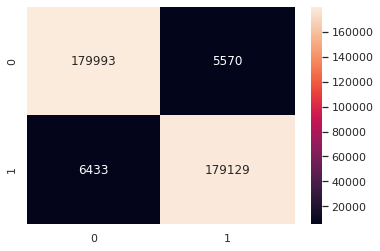

*******************************************
feature importance of top 50 features


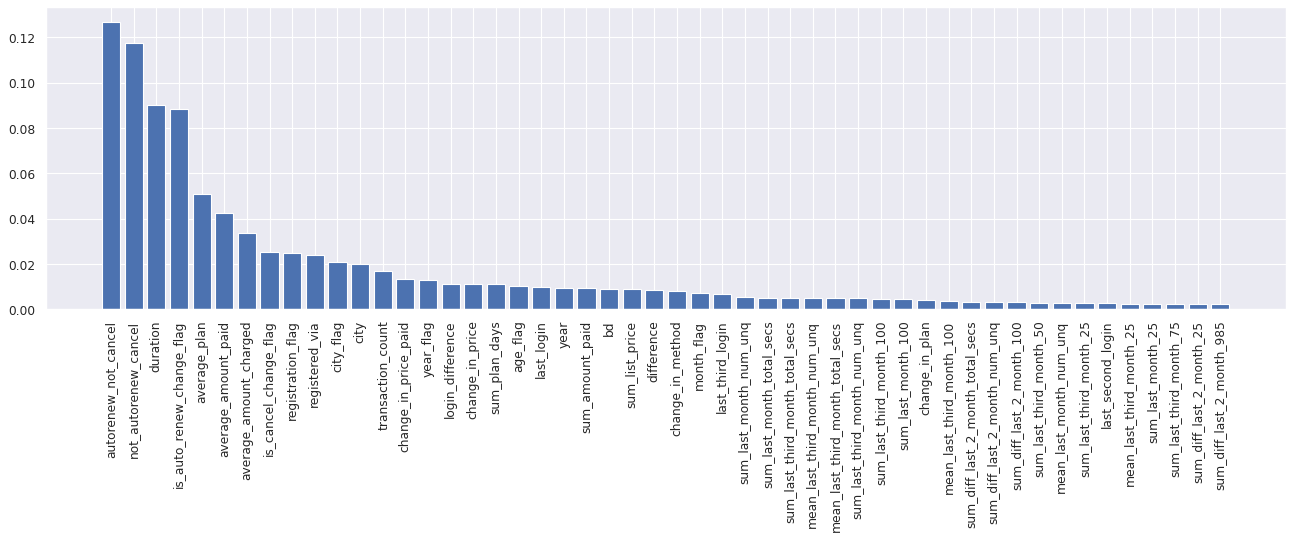

In [31]:
hyperparameter=lowest(parameter,loss_all)


# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=RandomForestClassifier(n_estimators=hyperparameter[0],n_jobs=-1,random_state=110,min_samples_split=hyperparameter[1])
print("Model is training")
model.fit(X_train,y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,y_cv,confusion=1)



# visualizing

print("*******************************************")
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(model.feature_importances_)[::-1]]
feature_importance=[model.feature_importances_[i] for i in np.argsort(model.feature_importances_)[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_rf.append(feature_name)
feature_importance_values_rf.append(feature_importance)

In [32]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred

In [33]:
msno.to_csv('/home/asad_99rizvi/another_data/random_forest_all_features.csv',index=False)

In [34]:
cd another_data

/home/asad_99rizvi/another_data


In [35]:
!kaggle competitions submit kkbox-churn-prediction-challenge -f random_forest_all_features.csv -m "My submission"

100%|██████████████████████████████████████| 43.7M/43.7M [00:00<00:00, 53.0MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

In [36]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno['is_churn']=msno['is_churn'].apply(lambda x:x*.6)
msno.to_csv('/home/asad_99rizvi/another_data/random_forest_all_features.csv',index=False)

In [37]:
!kaggle competitions submit kkbox-churn-prediction-challenge -f random_forest_all_features.csv -m "My submission"

100%|██████████████████████████████████████| 45.8M/45.8M [00:00<00:00, 61.6MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

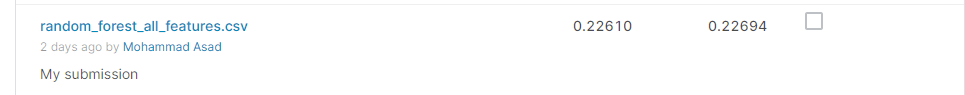

<h2><b> LGBMClassifier</b></h2>

Model is training
Done
log loss is  0.09236199912247259
F1 score is 0.9641486055534115
Model is training
Done
log loss is  0.0872018522724432
F1 score is 0.9660644829034924
Model is training
Done
log loss is  0.08621591610793992
F1 score is 0.9659953377426
Model is training
Done
log loss is  0.0854085327208969
F1 score is 0.966645441859835
Model is training
Done
log loss is  0.08689702667068669
F1 score is 0.9658108648637656
Model is training
Done
log loss is  0.08439491241115622
F1 score is 0.9667432825498851
Model is training
Done
log loss is  0.08393223625679366
F1 score is 0.9668625497332873
Model is training
Done
log loss is  0.08329828543102678
F1 score is 0.9672120037410034
Model is training
Done
log loss is  0.08410783874280749
F1 score is 0.9670082259037983
Model is training
Done
log loss is  0.08314185954447136
F1 score is 0.9671319469878865
Model is training
Done
log loss is  0.08293482935122064
F1 score is 0.9673113962509834
Model is training
Done
log loss is  0.08338230666

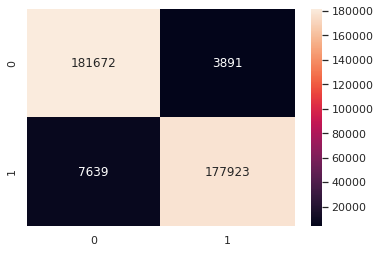

*******************************************


In [51]:
from lightgbm import LGBMClassifier 
hyp=[]
feature_importance_lgb=[]
feature_importance_values_lgb=[]
loss_all=[]


#hyperparameter tuning

for i in [100,200,500,1000]:
    for j in [30,60,80,100]:
        model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1, num_leaves=j,learning_rate=0.1, n_estimators=i, objective=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,subsample=1.0, subsample_freq=0, colsample_bytree=1.0,reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1)
        print("Model is training")
        model.fit(X_train[:sample_points_train],y_train[:sample_points_train])
        print("Done")
        y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
        y_pred=model.predict(X_cv[:sample_points_cv])
        loss=result(y_pred,y_pred_proba,y_cv[:sample_points_cv])
        hyp.append((i,j))
        loss_all.append(loss)
hyperparameter=lowest(hyp,loss_all)
print("********************************************")
print("Training model with best hyperparameter")




# training model with best hyperparameter

model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1,
               learning_rate=0.1, n_estimators=hyperparameter[0],  num_leaves=hyperparameter[1],
               subsample_for_bin=200000, objective=None, 
               class_weight=None, min_split_gain=0.0, 
               min_child_weight=0.001, min_child_samples=20,
               subsample=1.0, subsample_freq=0, colsample_bytree=1.0,
               reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1)
print("Model is training")
model.fit(X_train,y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,y_cv,confusion=1)
print("*******************************************")

In [52]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno.to_csv('/home/asad_99rizvi/another_data/lgbm_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f lgbm_all_features.csv -m "My submission"

100%|██████████████████████████████████████| 57.1M/57.1M [00:00<00:00, 60.1MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

<h2><b> XGBClassifier</b></h2>

In [34]:
from xgboost import XGBClassifier
hyp=[]
feature_importance_xgb=[]
feature_importance_values_xgb=[]
loss_all=[]


#hyperparameter tuning

for i in [100,200,500,1000]:
    for j in [0.5,0.6,0.8]:
        model=XGBClassifier(n_estimators=i,verbosity=1,n_jobs=-1,scale_pos_weight=j,random_state=110)
        print("Model is training")
        model.fit(X_train[:sample_points_train],y_train[:sample_points_train])
        print("Done")
        y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
        y_pred=model.predict(X_cv[:sample_points_cv])
        loss=result(y_pred,y_pred_proba,y_cv[:sample_points_cv],silent=1)
        hyp.append((i,j))
        loss_all.append(loss)

Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done


The best hyperparameter is  (500, 0.8) and the lowest loss associaed with it  0.0886125081807635
********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.08063848921958454
F1 score is 0.9681936933370825


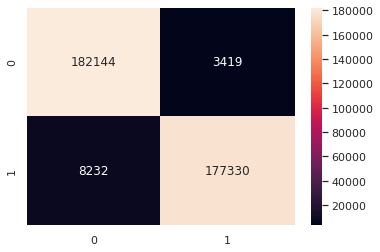

*******************************************
feature importance of top 50 features


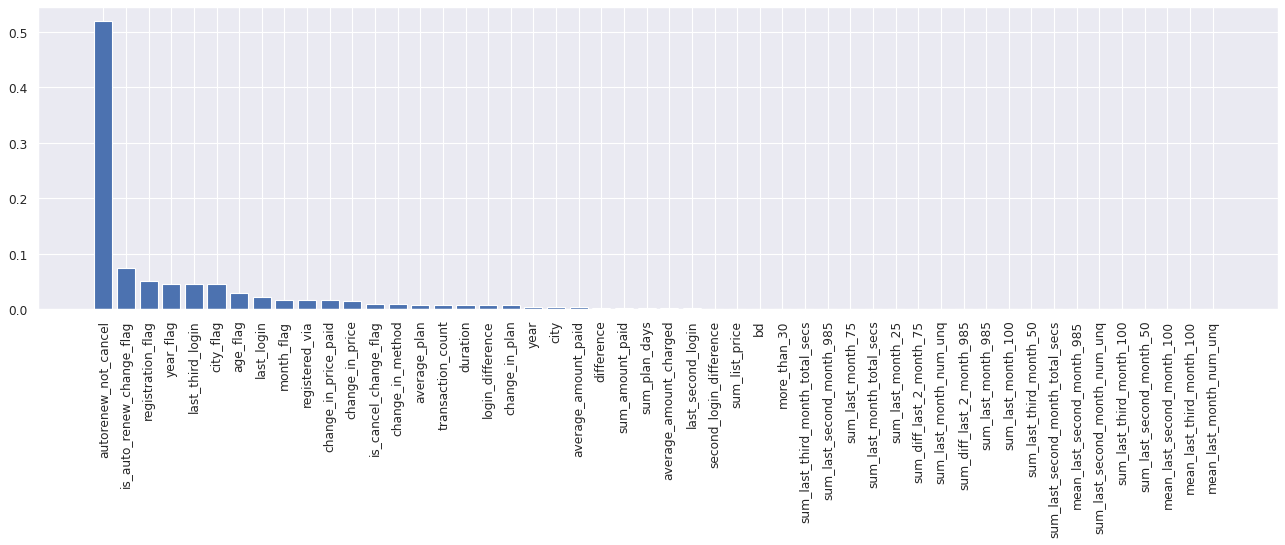

In [37]:
# training model with best hyperparameter

hyperparameter=lowest(hyp,loss_all)
print("********************************************")
print("Training model with best hyperparameter")
model=XGBClassifier(n_estimators=hyperparameter[0],n_jobs=-1,random_state=110,scale_pos_weight=hyperparameter[1],verbosity=1)
print("Model is training")
model.fit(X_train,y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,y_cv,confusion=1)
print("*******************************************")

#visualization


figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(model.feature_importances_)[::-1]]
feature_importance=[model.feature_importances_[i] for i in np.argsort(model.feature_importances_)[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_xgb.append(feature_name)
feature_importance_values_xgb.append(feature_importance)

In [38]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred

In [39]:
msno.to_csv('/home/asad_99rizvi/another_data/xgboost_all_features.csv',index=False)

In [40]:
cd another_data

/home/asad_99rizvi/another_data


In [41]:
!kaggle competitions submit kkbox-churn-prediction-challenge -f xgboost_all_features.csv -m "My submission xgboost"

100%|██████████████████████████████████████| 49.5M/49.5M [00:01<00:00, 50.7MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

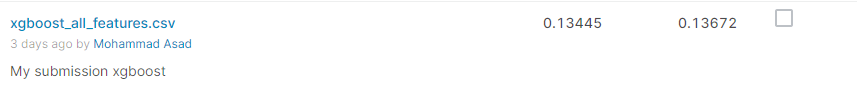

__Note__
this is the best model by far

In [45]:
import pickle
pickle.dump(model, open("xgboost.pickle.dat", 'wb'))

<h2> Adaboost </h2>

Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
Model is training
Done
The best hyperparameter is  (100, 0.5) and the lowest loss associaed with it  0.6474795256922473
********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.6553590702948515
F1 score is 0.9402264656616416


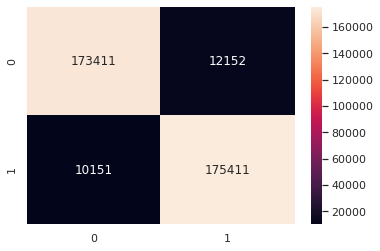

*******************************************
feature importance of top 50 features


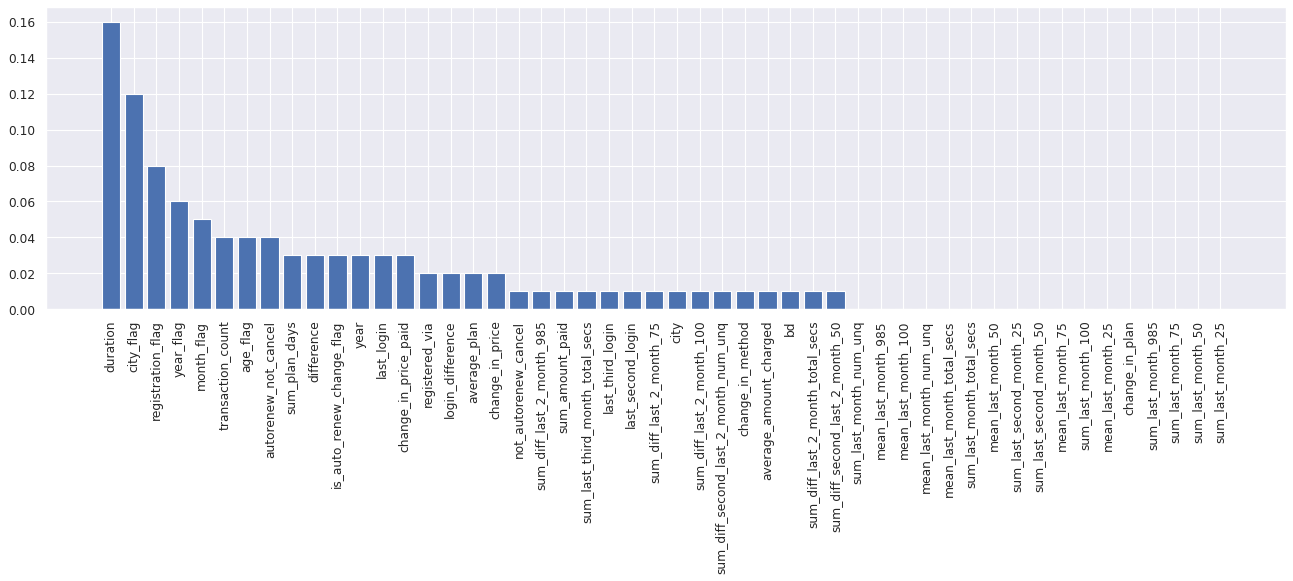

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
hyp=[]
feature_importance_xgb=[]
feature_importance_values_xgb=[]
loss_all=[]

# hyperparameter tuning


for i in [100,200,500,1000]:
    for j in [0.5,0.6,0.8]:
        for k in []
        model= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),n_estimators=i,learning_rate=j,random_state=110)
        print("Model is training")
        model.fit(X_train[:sample_points_train],y_train[:sample_points_train])
        print("Done")
        y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
        y_pred=model.predict(X_cv[:sample_points_cv])
        loss=result(y_pred,y_pred_proba,y_cv[:sample_points_cv],silent=1)
        hyp.append((i,j))
        loss_all.append(loss)
hyperparameter=lowest(hyp,loss_all)

# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),n_estimators=hyperparameter[0],random_state=110,learning_rate=hyperparameter[1])
print("Model is training")
model.fit(X_train,y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,y_cv,confusion=1)


# visualtion

print("*******************************************")
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(model.feature_importances_)[::-1]]
feature_importance=[model.feature_importances_[i] for i in np.argsort(model.feature_importances_)[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_xgb.append(feature_name)
feature_importance_values_xgb.append(feature_importance)    


In [60]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno.to_csv('/home/asad_99rizvi/another_data/adaboost_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f adaboost_all_features.csv -m "My submission xgboost"

100%|██████████████████████████████████████| 55.7M/55.7M [00:00<00:00, 68.4MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

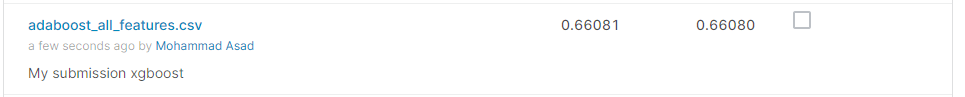

In [2]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Models", "LogLoss", "F1Score"]

x.add_row(["SGDClassifier hinge L2",0.2727275126483681 ,  0.8952110130051348])
x.add_row(["SGDClassifier hinge L1",0.2707784472494313 ,   0.8954328641082518])
x.add_row(["LogisticRegression l2 ", 0.27632660304346857, 0.8959001510068441])
x.add_row(["LogisticRegression l1 ", 0.2814341531415321, 0.895090488415581])
x.add_row(["RandomForest", 0.10154977017407293, 0.9675823270611812])
x.add_row(["LGBMClassifier", 0.07999589892267264, 0.9648827750351172])
x.add_row(["XGBoost",  0.08063848921958454, 0.9681936933370825])
x.add_row(["AdaBoost",  0.6553590702948515, 0.9402264656616416])

print(x)

+------------------------+---------------------+--------------------+
|         Models         |       LogLoss       |      F1Score       |
+------------------------+---------------------+--------------------+
| SGDClassifier hinge L2 |  0.2727275126483681 | 0.8952110130051348 |
| SGDClassifier hinge L1 |  0.2707784472494313 | 0.8954328641082518 |
| LogisticRegression l2  | 0.27632660304346857 | 0.8959001510068441 |
| LogisticRegression l1  |  0.2814341531415321 | 0.895090488415581  |
|      RandomForest      | 0.10154977017407293 | 0.9675823270611812 |
|     LGBMClassifier     | 0.07999589892267264 | 0.9648827750351172 |
|        XGBoost         | 0.08063848921958454 | 0.9681936933370825 |
|        AdaBoost        |  0.6553590702948515 | 0.9402264656616416 |
+------------------------+---------------------+--------------------+


# Ensemble Modelling

In [2]:
cd another_data

/home/asad_99rizvi/another_data


## creating 2 splits of the training data 

First split used in training ensemble<br>
second split used to train meta classifier

In [ ]:
X_train_1,X_train_2,y_train_1,y_train_2=train_test_split(X_train,y_train,test_size=0.5,random_state=110,stratify=y_train)

## Crossvalidation split for metaclassifier

In [8]:
X_train_2,X_cv_2,y_train_2,y_cv_2=train_test_split(X_train_2,y_train_2,test_size=0.3,random_state=110,stratify=y_train_2)

In [ ]:
X_train_1=pd.DataFrame(X_train_1)
y_train_1=pd.DataFrame(y_train_1)
y_train_1.reset_index(inplace=True,drop=True)
X_train_1['is_churn']=y_train_1

<h2> creating 50 models via bootstrapping using first split</h2>

In [ ]:
import joblib
from xgboost import XGBClassifier
models = [XGBClassifier(n_estimators=500,n_jobs=-1,random_state=110,scale_pos_weight=0.8,verbosity=1) for i in range(50)]
for model in models:
    X_temp=X_train_1.sample(frac=0.3,replace=True)
    X_temp_train=X_temp.iloc[:,:-1]
    y_temp_train=X_temp['is_churn']
    model.fit(X_temp_train,y_temp_train)
joblib.dump(models, 'models.pkl')

<h2>creating a new dataset for metaclassifier using second split </h2>

In [13]:
data=pd.DataFrame(columns=[i for i in range(len(models))],index=[i for i in range(X_train_2.shape[0])])
for i,model in enumerate(models):
    y_pred=model.predict_proba(X_train_2)[:,1]
    y_pred=pd.DataFrame(y_pred)
    data[i]=y_pred

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.628760,0.830968,0.555887,0.883078,0.499464,0.123982,0.953749,0.453210,0.162383,0.664441,...,0.313157,0.978589,0.528280,0.862833,0.850792,0.723705,0.401582,0.579929,0.210600,0.539069
1,0.014655,0.151483,0.077362,0.007740,0.038820,0.016265,0.011810,0.004273,0.002511,0.004478,...,0.001663,0.010157,0.022791,0.045513,0.003094,0.008599,0.028295,0.009629,0.011520,0.012580
2,0.002541,0.007730,0.000525,0.003042,0.001111,0.001167,0.000866,0.002145,0.000977,0.012357,...,0.000482,0.001142,0.059359,0.003446,0.009269,0.000591,0.032023,0.000862,0.002366,0.000789
3,0.000168,0.000563,0.032977,0.000376,0.000343,0.001027,0.006964,0.000771,0.001339,0.001102,...,0.000012,0.000273,0.001067,0.000262,0.001744,0.000031,0.040884,0.000238,0.000334,0.000437
4,0.000034,0.000120,0.000049,0.000017,0.000019,0.000101,0.000117,0.000134,0.000093,0.000084,...,0.000122,0.000083,0.000059,0.000170,0.000017,0.000126,0.000100,0.000194,0.000040,0.000071


In [15]:
data.shape

(388384, 50)

In [17]:
data.to_csv('/home/asad_99rizvi/another_data/50data.csv',index=False)

<h2> performing same operation on the test set </h2>

In [5]:
data_test=pd.DataFrame(columns=[i for i in range(len(models))],index=[i for i in range(X_test.shape[0])])
for i,model in enumerate(models):
    y_pred=model.predict_proba(X_test)[:,1]
    y_pred=pd.DataFrame(y_pred)
    data_test[i]=y_pred

In [6]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000049,0.000021,0.000015,0.000012,0.000014,0.000017,0.000100,0.000037,0.000009,0.000071,...,2.990880e-05,0.000017,0.000100,0.000105,0.000007,0.000062,0.000047,0.000035,0.000268,0.000045
1,0.000012,0.000009,0.000054,0.000003,0.000026,0.000002,0.000035,0.000002,0.000046,0.000014,...,5.745931e-07,0.000013,0.000021,0.000005,0.000018,0.000002,0.000078,0.000420,0.000001,0.000005
2,0.000480,0.000240,0.000632,0.000473,0.003784,0.007390,0.010691,0.001627,0.016339,0.005232,...,5.535610e-03,0.002244,0.001665,0.000327,0.002775,0.039671,0.000443,0.002869,0.000990,0.003460
3,0.000003,0.000004,0.000013,0.000005,0.000015,0.000004,0.000018,0.000007,0.000008,0.000024,...,3.440412e-05,0.000012,0.000015,0.000011,0.000057,0.000007,0.000008,0.000017,0.000013,0.000025
4,0.000024,0.000208,0.000206,0.000694,0.000128,0.001995,0.000300,0.000104,0.000106,0.000042,...,4.810539e-04,0.000111,0.000076,0.000128,0.000019,0.000045,0.000150,0.000174,0.000904,0.000007


In [7]:
data_test.shape

(907471, 50)

### saving both new train and test dataset

In [9]:
data_test.to_csv('/home/asad_99rizvi/another_data/50data_test.csv',index=False)

In [3]:
data=pd.read_csv('/home/asad_99rizvi/another_data/50data.csv')

In [4]:
y_train_2.reset_index(drop=True,inplace=True)

In [5]:
X_train_2=data
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.628760,0.830968,0.555887,0.883078,0.499464,0.123982,0.953749,0.453210,0.162383,0.664441,...,0.313157,0.978589,0.528280,0.862833,0.850792,0.723705,0.401582,0.579929,0.210600,0.539069
1,0.014655,0.151483,0.077362,0.007740,0.038820,0.016265,0.011810,0.004273,0.002511,0.004478,...,0.001663,0.010157,0.022791,0.045513,0.003094,0.008599,0.028295,0.009629,0.011520,0.012580
2,0.002541,0.007730,0.000525,0.003042,0.001111,0.001167,0.000866,0.002145,0.000977,0.012357,...,0.000482,0.001142,0.059359,0.003446,0.009269,0.000591,0.032023,0.000862,0.002366,0.000789
3,0.000168,0.000563,0.032977,0.000376,0.000343,0.001027,0.006964,0.000771,0.001339,0.001102,...,0.000012,0.000273,0.001067,0.000262,0.001744,0.000031,0.040884,0.000238,0.000334,0.000437
4,0.000034,0.000120,0.000049,0.000017,0.000019,0.000101,0.000117,0.000134,0.000093,0.000084,...,0.000122,0.000083,0.000059,0.000170,0.000017,0.000126,0.000100,0.000194,0.000040,0.000071


## using logistic regression as a Metaclassifier

Model is training
Done
log loss is  0.3355489783056858
F1 score is 0.7521790144150186
log loss is  0.33562606218289204
F1 score is 0.7505635597373322
Model is training
Done
log loss is  0.28067707060923847
F1 score is 0.7455684870188004
log loss is  0.28041996208654574
F1 score is 0.7484679665738162
Model is training
Done
log loss is  0.28131796743344095
F1 score is 0.738149546683023
log loss is  0.28078801513091906
F1 score is 0.7431953724048249
Model is training
Done
log loss is  0.2832587373086364
F1 score is 0.7369400151860288
log loss is  0.28279014552167203
F1 score is 0.7400204253807557
Model is training
Done
log loss is  0.2836196451350501
F1 score is 0.7364653752201328
log loss is  0.2832113632665945
F1 score is 0.7388992289284765
Model is training
Done
log loss is  0.28368262448632137
F1 score is 0.7364076934726639
log loss is  0.28328324879602645
F1 score is 0.7389455028799291
Model is training
Done
log loss is  0.2836891104008309
F1 score is 0.7365252456409382
log loss is  

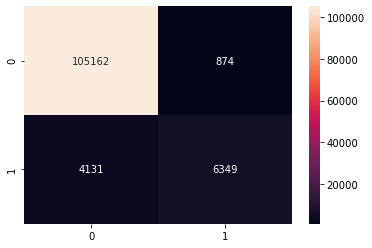

In [33]:
from sklearn.linear_model import LogisticRegression
reg=[]
loss_all=[]


#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=LogisticRegression(C=i,n_jobs=-1,random_state=110,class_weight='balanced')
    print("Model is training")
    model.fit(X_train_2,y_train_2)
    print("Done")
    
    y_pred_proba_train=model.predict_proba(X_train_2)
    y_pred_train=model.predict(X_train_2)
    result(y_pred_train,y_pred_proba_train,y_train_2)
    
    y_pred_proba=model.predict_proba(X_cv_2)
    y_pred=model.predict(X_cv_2)
    loss=result(y_pred,y_pred_proba,y_cv_2)
    
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)


# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=LogisticRegression(C=hyperparameter,n_jobs=-1,random_state=110)
print("Model is training")
model.fit(X_train_2,y_train_2)
print("Done")
y_pred_proba=model.predict_proba(X_cv_2)
y_pred=model.predict(X_cv_2)
loss=result(y_pred,y_pred_proba,y_cv_2,confusion=1)



## since logistic regression doesnot perform well trying XGBClassifier as metaclassifier

In [37]:
from xgboost import XGBClassifier
hyp=[]
loss_all=[]
# hyperparameter tuning on half of the dataset
half=int(X_train_2.shape[0]*0.5)
#hyperparameter tuning

for i in [100,200,500]:
    for j in [0.5,0.6,0.8]:
        model=XGBClassifier(n_estimators=i,verbosity=1,n_jobs=-1,scale_pos_weight=j,random_state=110)
        print("Model is training")
        model.fit(X_train_2[:half],y_train_2[:half])
        print("Done")
        
        y_pred_proba_train=model.predict_proba(X_train_2[:half])
        y_pred_train=model.predict(X_train_2[:half])
        result(y_pred_train,y_pred_proba_train,y_train_2[:half])
    
        y_pred_proba=model.predict_proba(X_cv_2)
        y_pred=model.predict(X_cv_2)
        loss=result(y_pred,y_pred_proba,y_cv_2)
        hyp.append((i,j))
        loss_all.append(loss)

Model is training
Done
log loss is  0.07263701398388933
F1 score is 0.800254515197494
log loss is  0.12310157254016774
F1 score is 0.7090806542583192
Model is training
Done
log loss is  0.06906449234650798
F1 score is 0.8149602528493439
log loss is  0.12092309955239974
F1 score is 0.716767497363601
Model is training
Done
log loss is  0.0671846076163488
F1 score is 0.8319633850177471
log loss is  0.11829189809694639
F1 score is 0.7272432432432433
Model is training
Done
log loss is  0.04495885542174342
F1 score is 0.8887466276464402
log loss is  0.12942758761902723
F1 score is 0.715470529691474
Model is training
Done
log loss is  0.044236254051440896
F1 score is 0.8989496559217675
log loss is  0.12784196310999538
F1 score is 0.7197469596989693
Model is training
Done
log loss is  0.03913963655098493
F1 score is 0.9298537525177336
log loss is  0.1259652550222057
F1 score is 0.7250881127843641
Model is training
Done
log loss is  0.013123356829108647
F1 score is 0.9935633902246586
log loss i

In [38]:
for i in [30,60,100]:
    for j in [0.5,0.6,0.8]:
        model=XGBClassifier(n_estimators=i,verbosity=1,n_jobs=-1,scale_pos_weight=j,random_state=110)
        print("Model is training")
        model.fit(X_train_2[:half],y_train_2[:half])
        print("Done")
        
        y_pred_proba_train=model.predict_proba(X_train_2[:half])
        y_pred_train=model.predict(X_train_2[:half])
        result(y_pred_train,y_pred_proba_train,y_train_2[:half])
    
        y_pred_proba=model.predict_proba(X_cv_2)
        y_pred=model.predict(X_cv_2)
        loss=result(y_pred,y_pred_proba,y_cv_2)
        hyp.append((i,j))
        loss_all.append(loss)

Model is training
Done
log loss is  0.09926643615491829
F1 score is 0.7325337331334333
log loss is  0.11923761819403549
F1 score is 0.7044985081478081
Model is training
Done
log loss is  0.095687928403878
F1 score is 0.7457394711067581
log loss is  0.11652363553087014
F1 score is 0.7143259534674103
Model is training
Done
log loss is  0.09307787903443458
F1 score is 0.7573128526051296
log loss is  0.11365803747121901
F1 score is 0.7292871957209912
Model is training
Done
log loss is  0.0873429140053222
F1 score is 0.7649990033884793
log loss is  0.12040860214777453
F1 score is 0.7062646069657413
Model is training
Done
log loss is  0.0849253142039087
F1 score is 0.774121203256789
log loss is  0.11805616333445351
F1 score is 0.7156353066130023
Model is training
Done
log loss is  0.08217075579481645
F1 score is 0.778586966802232
log loss is  0.11554012457012874
F1 score is 0.7298444130127298
Model is training
Done
log loss is  0.07263701398388933
F1 score is 0.800254515197494
log loss is  0

********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.11584908604208431
F1 score is 0.7128161409491333


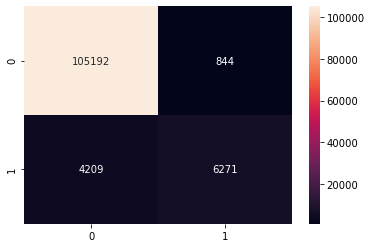

*******************************************


In [9]:
# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=XGBClassifier(n_estimators=30,n_jobs=-1,random_state=110,scale_pos_weight=0.6,verbosity=1)
print("Model is training")
model.fit(X_train_2,y_train_2)
print("Done")
y_pred_proba=model.predict_proba(X_cv_2)
y_pred=model.predict(X_cv_2)
loss=result(y_pred,y_pred_proba,y_cv_2,confusion=1)
print("*******************************************")

In [10]:
data_test=pd.read_csv('/home/asad_99rizvi/another_data/50data_test.csv')

In [11]:
y_pred=model.predict_proba(data_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno.to_csv('/home/asad_99rizvi/another_data/ensemble_new_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f ensemble_new_all_features.csv -m "My submission ensemble"

100%|██████████████████████████████████████| 50.1M/50.1M [00:00<00:00, 84.7MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

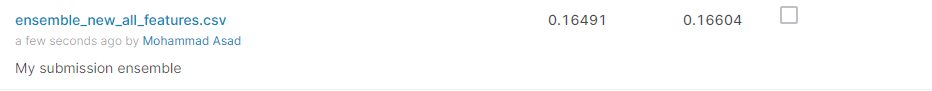

In [13]:
y_pred=model.predict_proba(data_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno['is_churn']=msno['is_churn']*0.6
msno.to_csv('/home/asad_99rizvi/another_data/enseble_2_new_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f enseble_2_new_all_features.csv -m "My submission ensemble"

100%|██████████████████████████████████████| 50.1M/50.1M [00:00<00:00, 59.6MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

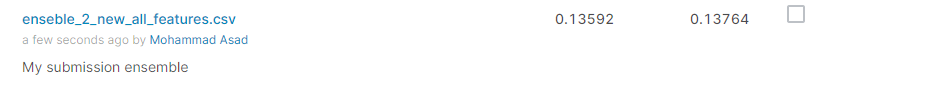

### some variation in the metacalssifier

********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.11584581915041804
F1 score is 0.7128161409491333


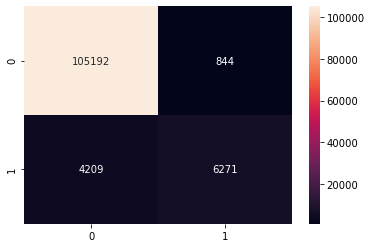

*******************************************


In [14]:
# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=XGBClassifier(n_estimators=30,n_jobs=-1,random_state=110,scale_pos_weight=0.6,verbosity=1)
print("Model is training")
model.fit(X_train_2*0.6,y_train_2)
print("Done")
y_pred_proba=model.predict_proba(X_cv_2*0.6)
y_pred=model.predict(X_cv_2*0.6)
loss=result(y_pred,y_pred_proba,y_cv_2,confusion=1)
print("*******************************************")

In [15]:
y_pred=model.predict_proba(data_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno.to_csv('/home/asad_99rizvi/another_data/ensemble3_new_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f ensemble3_new_all_features.csv -m "My submission ensemble"

100%|██████████████████████████████████████| 50.0M/50.0M [00:00<00:00, 83.6MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

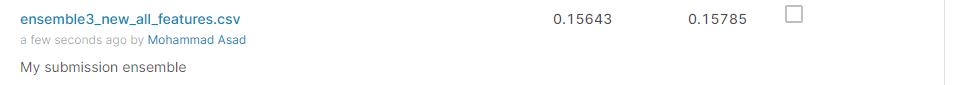

In [17]:
y_pred=model.predict_proba(data_test)[:,1]
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno['is_churn']=msno['is_churn']*0.6
msno.to_csv('/home/asad_99rizvi/another_data/ensemble4_new_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f ensemble4_new_all_features.csv -m "My submission ensemble"

100%|██████████████████████████████████████| 50.0M/50.0M [00:00<00:00, 61.2MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

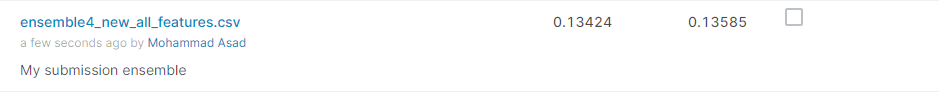

<h1>above model gave the best performance </h1>

## Saving the best model

In [18]:
import pickle
pickle.dump(model, open("metaclassifer.pickle.dat", 'wb'))

<h1> Note </h1>
<h2>
I tried more than a dozen variation of other models that doesn't work well<br>
Description of those models<br>
1. Simple Average model<br>
2. Calibrated classifier<br>
3. Random Forests<br>
4. SGDClassifiers<br>
5. SGDClasifiers with Calibration<br>
6. Logistic Regression with Calibration<br>
    </h2>

Screenshot that trials are

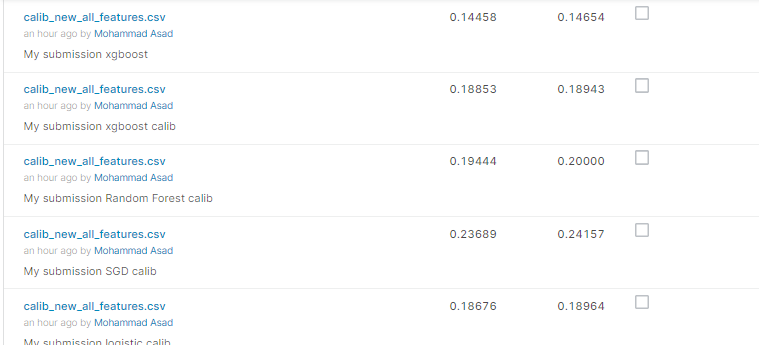

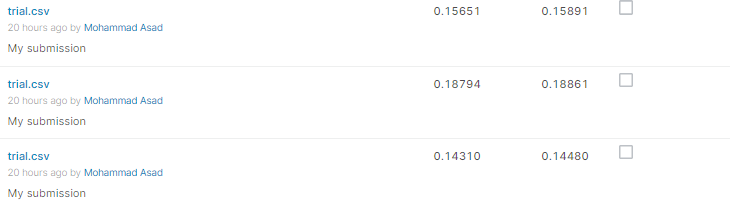

In [18]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Models", "LogLoss", "F1Score"]

x.add_row(["SGDClassifier hinge L2",0.2727275126483681 ,  0.8952110130051348])
x.add_row(["SGDClassifier hinge L1",0.2707784472494313 ,   0.8954328641082518])
x.add_row(["LogisticRegression l2 ", 0.27632660304346857, 0.8959001510068441])
x.add_row(["LogisticRegression l1 ", 0.2814341531415321, 0.895090488415581])
x.add_row(["RandomForest", 0.10154977017407293, 0.9675823270611812])
x.add_row(["LGBMClassifier", 0.07999589892267264, 0.9648827750351172])
x.add_row(["XGBoost",  0.08063848921958454, 0.9681936933370825])
x.add_row(["AdaBoost",  0.6553590702948515, 0.9402264656616416])
x.add_row(["logistic Regression Meta",  0.140060000946033, 0.7172795571372085])
x.add_row(["Xgboost Meta version 1.0",  0.11584908604208431, 0.7128161409491333])
x.add_row(["XGBoost Meta version 2.0",  0.11584581915041804, 0.7128161409491333])

print(x)

+--------------------------+---------------------+--------------------+
|          Models          |       LogLoss       |      F1Score       |
+--------------------------+---------------------+--------------------+
|  SGDClassifier hinge L2  |  0.2727275126483681 | 0.8952110130051348 |
|  SGDClassifier hinge L1  |  0.2707784472494313 | 0.8954328641082518 |
|  LogisticRegression l2   | 0.27632660304346857 | 0.8959001510068441 |
|  LogisticRegression l1   |  0.2814341531415321 | 0.895090488415581  |
|       RandomForest       | 0.10154977017407293 | 0.9675823270611812 |
|      LGBMClassifier      | 0.07999589892267264 | 0.9648827750351172 |
|         XGBoost          | 0.08063848921958454 | 0.9681936933370825 |
|         AdaBoost         |  0.6553590702948515 | 0.9402264656616416 |
| logistic Regression Meta |  0.140060000946033  | 0.7172795571372085 |
| Xgboost Meta version 1.0 | 0.11584908604208431 | 0.7128161409491333 |
| XGBoost Meta version 2.0 | 0.11584581915041804 | 0.71281614094

# function to train ensemble model

In [ ]:
def ensemble(X_train,y_train,X_test,n_model=50):
    
    from sklearn.model_selection import train_test_split
    X_train_1,X_train_2,y_train_1,y_train_2=train_test_split(X_train,y_train,test_size=0.5,random_state=110,stratify=y_train)
    
    X_train_1=pd.DataFrame(X_train_1)
    y_train_1=pd.DataFrame(y_train_1)
    y_train_1.reset_index(inplace=True,drop=True)
    X_train_1['is_churn']=y_train_1
    
    
    from xgboost import XGBClassifier
    models = [XGBClassifier(n_estimators=500,n_jobs=-1,random_state=110,scale_pos_weight=0.8,verbosity=1) for i in range(n_model)]
    for model in models:
        X_temp=X_train_1.sample(frac=0.3,replace=True)
        X_temp_train=X_temp.iloc[:,:-1]
        y_temp_train=X_temp['is_churn']
        model.fit(X_temp_train,y_temp_train)
    
        
    data=pd.DataFrame(columns=[i for i in range(len(models))],index=[i for i in range(X_train_2.shape[0])])
    for i,model in enumerate(models):
        y_pred=model.predict_proba(X_train_2)[:,1]
        y_pred=pd.DataFrame(y_pred)
        data[i]=y_pred
        
    data_test=pd.DataFrame(columns=[i for i in range(len(models))],index=[i for i in range(X_test.shape[0])])
    for i,model in enumerate(models):
        y_pred=model.predict_proba(X_test)[:,1]
        y_pred=pd.DataFrame(y_pred)
        data_test[i]=y_pred
        
    y_train_2.reset_index(drop=True,inplace=True)
    X_train_2=data
    
    model=XGBClassifier(n_estimators=30,n_jobs=-1,random_state=110,scale_pos_weight=0.6,verbosity=1)
    model.fit(X_train_2,y_train_2)
    
    y_pred=model.predict_proba(data_test)[:,1]
    y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
    y_pred=y_pred*0.6
    return y_pred
    
    

<h1> Deep Learning Models </h1>

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X_bal,y_bal,test_size=0.3,random_state=110,stratify=y_bal)

In [21]:
y_train=y_train.values
y_train=y_train.reshape(-1,1)
y_cv=y_cv.values
y_cv=y_cv.reshape(-1,1)
print(X_train.shape,y_train.shape)

(776768, 102) (776768, 1)


In [22]:
from keras.models import Sequential
import keras
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

In [23]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [30]:
import tensorflow as tf

# defining some custom callbacks 
# looking on F1 score as i am watching that metric
#Sending my own stratified X_cv 
# stopping if accuracy does not increase
class CustomCallback(tf.keras.callbacks.Callback):
    
    def __init__(self,X_cv,y_cv):
        self.x = X_cv
        self.y = y_cv
    def on_train_begin(self, logs={}):
        self.history={'loss': [],'F1_score':[]}

    def on_train_begin(self, logs={}):
            self.history={'loss': [],'F1_score':[]}
            
    def on_epoch_end(self, epoch, logs={}):
        self.history['loss'].append(logs.get('loss'))
        y_pred= self.model.predict_classes(self.x)
        F1_score=f1_score(self.y, y_pred, average='micro')
        self.history['F1_score'].append(F1_score)
        print("F1 Score  {}".format(self.history['F1_score'][0]))
               
history_own=CustomCallback(X_cv,y_cv)

from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss', patience=3,verbose=1)



callback_list=[history_own,early_stop]

In [8]:
#hyperparameter tuning

for i in [64,128,512]:
    for j in [128,64,32]:
        model = Sequential()
        model.add(Dense(i, input_dim=int(X_train.shape[1]),activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(rate=0.25))
        model.add(Dense(j, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(rate=0.25))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(rate=0.1))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        # Compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=15, batch_size=2**13,validation_data=(X_cv,y_cv), verbose=1,callbacks=callback_list)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                6592      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)               

776768/776768 [==============================] - 8s 10us/step - loss: 0.1419 - accuracy: 0.9474 - val_loss: 0.1340 - val_accuracy: 0.9497
F1 Score  0.9324019527065996
Epoch 15/15
776768/776768 [==============================] - 9s 11us/step - loss: 0.1411 - accuracy: 0.9478 - val_loss: 0.1323 - val_accuracy: 0.9500
F1 Score  0.9324019527065996
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                6592      
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
______________________________________

776768/776768 [==============================] - 9s 11us/step - loss: 0.1478 - accuracy: 0.9455 - val_loss: 0.1381 - val_accuracy: 0.9472
F1 Score  0.9305532668699019
Epoch 11/15
776768/776768 [==============================] - 8s 11us/step - loss: 0.1458 - accuracy: 0.9458 - val_loss: 0.1365 - val_accuracy: 0.9477
F1 Score  0.9305532668699019
Epoch 12/15
776768/776768 [==============================] - 8s 11us/step - loss: 0.1438 - accuracy: 0.9466 - val_loss: 0.1342 - val_accuracy: 0.9484
F1 Score  0.9305532668699019
Epoch 13/15
776768/776768 [==============================] - 9s 11us/step - loss: 0.1425 - accuracy: 0.9474 - val_loss: 0.1327 - val_accuracy: 0.9492
F1 Score  0.9305532668699019
Epoch 14/15
776768/776768 [==============================] - 8s 11us/step - loss: 0.1411 - accuracy: 0.9480 - val_loss: 0.1327 - val_accuracy: 0.9497
F1 Score  0.9305532668699019
Epoch 15/15
776768/776768 [==============================] - 8s 11us/step - loss: 0.1399 - accuracy: 0.9485 - val_los

F1 Score  0.9400593227321414
Epoch 9/15
776768/776768 [==============================] - 18s 23us/step - loss: 0.1364 - accuracy: 0.9501 - val_loss: 0.1318 - val_accuracy: 0.9514
F1 Score  0.9400593227321414
Epoch 10/15
776768/776768 [==============================] - 18s 23us/step - loss: 0.1353 - accuracy: 0.9505 - val_loss: 0.1307 - val_accuracy: 0.9520
F1 Score  0.9400593227321414
Epoch 11/15
776768/776768 [==============================] - 18s 23us/step - loss: 0.1339 - accuracy: 0.9507 - val_loss: 0.1285 - val_accuracy: 0.9525
F1 Score  0.9400593227321414
Epoch 12/15
776768/776768 [==============================] - 19s 25us/step - loss: 0.1328 - accuracy: 0.9513 - val_loss: 0.1274 - val_accuracy: 0.9525
F1 Score  0.9400593227321414
Epoch 13/15
776768/776768 [==============================] - 19s 24us/step - loss: 0.1321 - accuracy: 0.9514 - val_loss: 0.1269 - val_accuracy: 0.9525
F1 Score  0.9400593227321414
Epoch 14/15
776768/776768 [==============================] - 19s 24us/st

## The best hyperarameter is 512 128

In [31]:
model = Sequential()
model.add(Dense(512, input_dim=int(X_train.shape[1]),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               52736     
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)               

In [32]:
callback_list=[history_own,early_stop]

In [33]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=2**13,validation_data=(X_cv,y_cv), verbose=1,callbacks=callback_list)

Train on 776768 samples, validate on 194192 samples
Epoch 1/50
776768/776768 [==============================] - 24s 30us/step - loss: 0.2062 - accuracy: 0.9241 - val_loss: 0.1834 - val_accuracy: 0.9412
F1 Score  0.9412231193869984
Epoch 2/50
776768/776768 [==============================] - 21s 27us/step - loss: 0.1641 - accuracy: 0.9414 - val_loss: 0.1565 - val_accuracy: 0.9422
F1 Score  0.9412231193869984
Epoch 3/50
776768/776768 [==============================] - 21s 27us/step - loss: 0.1541 - accuracy: 0.9441 - val_loss: 0.1502 - val_accuracy: 0.9438
F1 Score  0.9412231193869984
Epoch 4/50
776768/776768 [==============================] - 22s 28us/step - loss: 0.1470 - accuracy: 0.9463 - val_loss: 0.1432 - val_accuracy: 0.9467
F1 Score  0.9412231193869984
Epoch 5/50
776768/776768 [==============================] - 22s 28us/step - loss: 0.1423 - accuracy: 0.9477 - val_loss: 0.1375 - val_accuracy: 0.9491
F1 Score  0.9412231193869984
Epoch 6/50
776768/776768 [===========================

In [34]:
y_pred=model.predict_proba(X_test)

In [36]:
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno['is_churn']=msno['is_churn']*0.6
msno.to_csv('/home/asad_99rizvi/another_data/MLP_new_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f MLP_new_all_features.csv -m "My submission MLP"

100%|██████████████████████████████████████| 50.0M/50.0M [00:01<00:00, 50.0MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

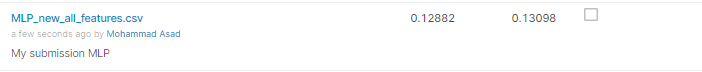

### Amazing performance by MLP this become the best model till now

https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [24]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [26]:
# load json and create model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [27]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
loaded_model.predict_proba(X_test[:10])

array([[8.8691711e-05],
       [4.3112040e-04],
       [7.8796148e-03],
       [1.1497736e-04],
       [1.9727349e-03],
       [6.9527316e-01],
       [5.4705143e-03],
       [1.2752414e-04],
       [3.7788388e-03],
       [1.6898515e-02]], dtype=float32)

## convolution Neural Networks

In [5]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_cv=np.reshape(X_cv,(X_cv.shape[0],X_cv.shape[1],1))

In [6]:
import tensorflow as tf
from sklearn.metrics import f1_score
# defining some custom callbacks 
# looking on F1 score as i am watching that metric
#Sending my own stratified X_cv 
# stopping if accuracy does not increase
class CustomCallback(tf.keras.callbacks.Callback):
    
    def __init__(self,X_cv,y_cv):
        self.x = X_cv
        self.y = y_cv
    def on_train_begin(self, logs={}):
        self.history={'loss': [],'F1_score':[]}

    def on_train_begin(self, logs={}):
            self.history={'loss': [],'F1_score':[]}
            
    def on_epoch_end(self, epoch, logs={}):
        self.history['loss'].append(logs.get('loss'))
        y_pred= self.model.predict_classes(self.x)
        F1_score=f1_score(self.y, y_pred, average='micro')
        self.history['F1_score'].append(F1_score)
        print("F1 Score  {}".format(self.history['F1_score'][0]))
               
history_own=CustomCallback(X_cv,y_cv)

from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss', patience=3,verbose=1)



callback_list=[history_own,early_stop]

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers import MaxPool1D

Using TensorFlow backend.


In [11]:
sample=X_train.shape[0]*0.3
for i in [64,32]:
    for j in [32,16]: 
        model = Sequential()
        model.add(Conv1D(filters=i, kernel_size=3, activation='relu', input_shape=(X_train.shape[1:])))
        model.add(Conv1D(filters=j, kernel_size=3, activation='relu'))
        model.add(Dropout(0.5))
        model.add(MaxPool1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.summary()
        model.fit(X_train[:int(sample)], y_train[:int(sample)], epochs=10, batch_size=2**16,validation_data=(X_cv,y_cv), verbose=1,callbacks=callback_list)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100, 64)           256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 98, 32)            6176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 32)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (D

Train on 233030 samples, validate on 194192 samples
Epoch 1/10
233030/233030 [==============================] - 22s 95us/step - loss: 0.5199 - accuracy: 0.7966 - val_loss: 0.3761 - val_accuracy: 0.9101
F1 Score  0.9100580868418885
Epoch 2/10
233030/233030 [==============================] - 20s 86us/step - loss: 0.3893 - accuracy: 0.9105 - val_loss: 0.3446 - val_accuracy: 0.9101
F1 Score  0.9100580868418885
Epoch 3/10
233030/233030 [==============================] - 20s 84us/step - loss: 0.3420 - accuracy: 0.9109 - val_loss: 0.3150 - val_accuracy: 0.9136
F1 Score  0.9100580868418885
Epoch 4/10
233030/233030 [==============================] - 20s 85us/step - loss: 0.3036 - accuracy: 0.9150 - val_loss: 0.3235 - val_accuracy: 0.9170
F1 Score  0.9100580868418885
Epoch 5/10
233030/233030 [==============================] - 20s 87us/step - loss: 0.2943 - accuracy: 0.9179 - val_loss: 0.2931 - val_accuracy: 0.9187
F1 Score  0.9100580868418885
Epoch 6/10
233030/233030 [===========================

## best hyperparameter is 32 32

In [9]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=50, batch_size=2**16,validation_data=(X_cv,y_cv), verbose=1,callbacks=callback_list)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100, 32)           128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 98, 32)            3104      
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 32)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (D

In [10]:
cd another_data

/home/asad_99rizvi/another_data


In [13]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [14]:
y_pred=model.predict_proba(X_test)
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno['is_churn']=msno['is_churn']*0.6
msno.to_csv('/home/asad_99rizvi/another_data/cnn_new_all_features.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f cnn_new_all_features.csv -m "My submission cnn"

100%|██████████████████████████████████████| 49.3M/49.3M [00:00<00:00, 64.5MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

In [15]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
cd another_data

/home/asad_99rizvi/another_data


In [10]:
# load json and create model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Loaded model from disk


In [11]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
loaded_model.predict_proba(X_test[:10])

array([[0.00364107],
       [0.01536107],
       [0.06808782],
       [0.01540682],
       [0.01040664],
       [0.8286589 ],
       [0.02436614],
       [0.01086202],
       [0.01628147],
       [0.01288343]], dtype=float32)

## training it for more epochs

In [16]:
model.fit(X_train, y_train, epochs=80,initial_epoch=50, batch_size=2**16,validation_data=(X_cv,y_cv), verbose=1,callbacks=callback_list)

Train on 776768 samples, validate on 194192 samples
Epoch 51/80
776768/776768 [==============================] - 61s 79us/step - loss: 0.1458 - accuracy: 0.9457 - val_loss: 0.1400 - val_accuracy: 0.9484
F1 Score  0.9484479278240092
Epoch 52/80
776768/776768 [==============================] - 54s 70us/step - loss: 0.1426 - accuracy: 0.9468 - val_loss: 0.1384 - val_accuracy: 0.9486
F1 Score  0.9484479278240092
Epoch 53/80
776768/776768 [==============================] - 55s 71us/step - loss: 0.1417 - accuracy: 0.9470 - val_loss: 0.1386 - val_accuracy: 0.9490
F1 Score  0.9484479278240092
Epoch 54/80
776768/776768 [==============================] - 55s 71us/step - loss: 0.1411 - accuracy: 0.9473 - val_loss: 0.1389 - val_accuracy: 0.9492
F1 Score  0.9484479278240092
Epoch 55/80
776768/776768 [==============================] - 55s 71us/step - loss: 0.1406 - accuracy: 0.9472 - val_loss: 0.1380 - val_accuracy: 0.9493
F1 Score  0.9484479278240092
Epoch 56/80
776768/776768 [=====================

In [18]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
# load json and create model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [17]:
y_pred=model.predict_proba(X_test)
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno['is_churn']=msno['is_churn']*0.6
msno.to_csv('/home/asad_99rizvi/another_data/cnn.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f cnn.csv -m "My submission cnn"

100%|██████████████████████████████████████| 49.5M/49.5M [00:00<00:00, 52.9MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

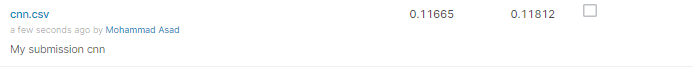

This is the best loss <br>
NOTE i trained it to more epochs and loss started increasing

## LSTM

In [6]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [7]:
import tensorflow as tf
from sklearn.metrics import f1_score
# defining some custom callbacks 
# looking on F1 score as i am watching that metric
#Sending my own stratified X_cv 
# stopping if accuracy does not increase
class CustomCallback(tf.keras.callbacks.Callback):
    
    def __init__(self,X_cv,y_cv):
        self.x = X_cv
        self.y = y_cv
    def on_train_begin(self, logs={}):
        self.history={'loss': [],'F1_score':[]}

    def on_train_begin(self, logs={}):
            self.history={'loss': [],'F1_score':[]}
            
    def on_epoch_end(self, epoch, logs={}):
        self.history['loss'].append(logs.get('loss'))
        y_pred= self.model.predict_classes(self.x)
        F1_score=f1_score(self.y, y_pred, average='micro')
        self.history['F1_score'].append(F1_score)
        print("F1 Score  {}".format(self.history['F1_score'][0]))
               
history_own=CustomCallback(X_cv,y_cv)

from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss', patience=3,verbose=1)



callback_list=[history_own,early_stop]

In [8]:
model=Sequential()
model.add(LSTM(units=50,input_shape=X_train.shape[1:],return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 102, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 102, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_______

In [9]:
v=int(X_train.shape[0]*0.3)

In [11]:
model.fit(X_train[:v], y_train[:v], epochs=10,validation_data=(X_cv,y_cv), verbose=1,batch_size=2**15)

Train on 233030 samples, validate on 194192 samples
Epoch 1/10
233030/233030 [==============================] - 242s 1ms/step - loss: 0.4231 - accuracy: 0.9105 - val_loss: 0.3339 - val_accuracy: 0.9101
Epoch 2/10
233030/233030 [==============================] - 239s 1ms/step - loss: 0.3314 - accuracy: 0.9105 - val_loss: 0.3074 - val_accuracy: 0.9101
Epoch 3/10
233030/233030 [==============================] - 239s 1ms/step - loss: 0.3069 - accuracy: 0.9105 - val_loss: 0.3067 - val_accuracy: 0.9101
Epoch 4/10
233030/233030 [==============================] - 239s 1ms/step - loss: 0.3077 - accuracy: 0.9105 - val_loss: 0.3018 - val_accuracy: 0.9101
Epoch 5/10
233030/233030 [==============================] - 238s 1ms/step - loss: 0.3042 - accuracy: 0.9105 - val_loss: 0.3028 - val_accuracy: 0.9101
Epoch 6/10
233030/233030 [==============================] - 240s 1ms/step - loss: 0.3044 - accuracy: 0.9105 - val_loss: 0.3017 - val_accuracy: 0.9101
Epoch 7/10
233030/233030 [======================

## acuuracy is not increasing and loss is not decreasing 
## LSTM is not working well on this data
## i tried some other variation also and got no promising results
### Training time of LSTM is also very high comparing with training time of other models

## Other models got approx 95% accuracy but LSTM is stuck on 91% accuracy

In [65]:
y_pred=model.predict_proba(X_test)
y_pred=pd.DataFrame(y_pred,columns=['is_churn'])
msno=pd.DataFrame(test_data['msno'])
msno['is_churn']=y_pred
msno['is_churn']=msno['is_churn']*0.6
msno.to_csv('/home/asad_99rizvi/another_data/lstm.csv',index=False)
!kaggle competitions submit kkbox-churn-prediction-challenge -f lstm.csv -m "My submission lstm"

100%|██████████████████████████████████████| 49.1M/49.1M [00:00<00:00, 67.8MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

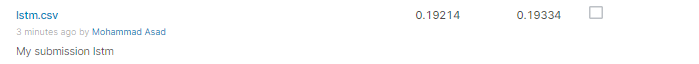

## Some other non fruitful submission

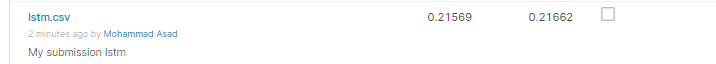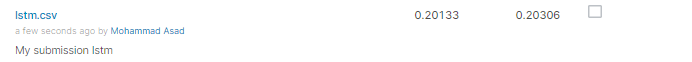

In [69]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Models", "LogLoss", "F1Score"]

x.add_row(["SGDClassifier hinge L2",0.2727275126483681 ,  0.8952110130051348])
x.add_row(["SGDClassifier hinge L1",0.2707784472494313 ,   0.8954328641082518])
x.add_row(["LogisticRegression l2 ", 0.27632660304346857, 0.8959001510068441])
x.add_row(["LogisticRegression l1 ", 0.2814341531415321, 0.895090488415581])
x.add_row(["RandomForest", 0.10154977017407293, 0.9675823270611812])
x.add_row(["LGBMClassifier", 0.07999589892267264, 0.9648827750351172])
x.add_row(["XGBoost",  0.08063848921958454, 0.9681936933370825])
x.add_row(["AdaBoost",  0.6553590702948515, 0.9402264656616416])
x.add_row(["logistic Regression Meta",  0.140060000946033, 0.7172795571372085])
x.add_row(["Xgboost Meta version 1.0",  0.11584908604208431, 0.7128161409491333])
x.add_row(["XGBoost Meta version 2.0",  0.11584581915041804, 0.7128161409491333])
x.add_row(["MLP",  0.1211,0.9412231193869984])
x.add_row(["CNN",  0.1312, 0.948447927824009])
x.add_row(["LSTM", 0.3008, '-'])

print(x)

+--------------------------+---------------------+--------------------+
|          Models          |       LogLoss       |      F1Score       |
+--------------------------+---------------------+--------------------+
|  SGDClassifier hinge L2  |  0.2727275126483681 | 0.8952110130051348 |
|  SGDClassifier hinge L1  |  0.2707784472494313 | 0.8954328641082518 |
|  LogisticRegression l2   | 0.27632660304346857 | 0.8959001510068441 |
|  LogisticRegression l1   |  0.2814341531415321 | 0.895090488415581  |
|       RandomForest       | 0.10154977017407293 | 0.9675823270611812 |
|      LGBMClassifier      | 0.07999589892267264 | 0.9648827750351172 |
|         XGBoost          | 0.08063848921958454 | 0.9681936933370825 |
|         AdaBoost         |  0.6553590702948515 | 0.9402264656616416 |
| logistic Regression Meta |  0.140060000946033  | 0.7172795571372085 |
| Xgboost Meta version 1.0 | 0.11584908604208431 | 0.7128161409491333 |
| XGBoost Meta version 2.0 | 0.11584581915041804 | 0.71281614094

# The Best Model is CNN which gave us a loss of 0.11665 which gives us 44 Rank in competition


## Total participants 575 

# Therefore this model makes us in top 7 percent